In [5]:
import numpy as np
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
import pandas as pd

## **Assignment 4**
**Lisa Samuelsson & Dylan Osolian**

### **Exercise question**
**Why could the classifier "memorize" the training data in the first case, but not in the second case?**


In the first case, the training data was linearly separable. In the second case however, the data is not linearly separable, and therefore the classifier can't "memorize" it. We can see this by encoding and plotting the data:

**Data set 1, encoding of the features:**\
**City**\
Gothenburg = 1\
Paris = 0

**Month**\
July = 1\
December = 0

**Weather**\
Rain\
Sun

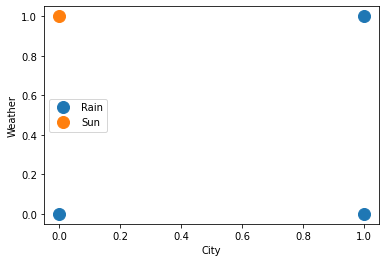

In [45]:
data_1 = [[1, 1, 'Rain'], [1, 0, 'Rain'], [0, 1, 'Sun'], [0, 0, 'Rain']]

df_1 = pd.DataFrame(data_1, columns=['City', 'Month', 'Weather'])

groups = df_1.groupby('Weather')
for name, group in groups:
    plt.plot(group.City, group.Month, marker='o', linestyle='', markersize=12, label=name)

plt.ylabel('Weather')
plt.xlabel('City')
plt.legend()

plt.show()

**Data set 2, encoding of the features:**\
**City**\
Paris = 1\
Sydney = 0

**Month**\
July = 1\
December = 0

**Weather**\
Rain\
Sun

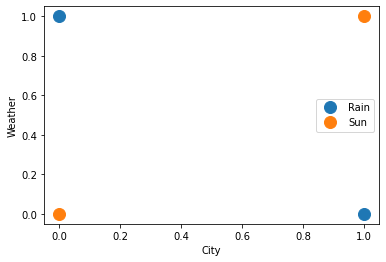

In [46]:
data_2 = [[0, 1, 'Rain'], [0, 0, 'Sun'], [1, 1, 'Sun'], [1, 0, 'Rain']]

df_2 = pd.DataFrame(data_2, columns=['City', 'Month', 'Weather'])

groups = df_2.groupby('Weather')
for name, group in groups:
    plt.plot(group.City, group.Month, marker='o', linestyle='', markersize=12, label=name)

plt.ylabel('Weather')
plt.xlabel('City')
plt.legend()

plt.show()

### **Given code for a general linear classifier**

In [ ]:
# This is code for a general linear classifier. This code was given. 
class LinearClassifier(BaseEstimator):
    """
    General class for binary linear classifiers. Implements the predict
    function, which is the same for all binary linear classifiers. There are
    also two utility functions.
    """

    def decision_function(self, X):
        """
        Computes the decision function for the inputs X. The inputs are assumed to be
        stored in a matrix, where each row contains the features for one
        instance.
        """
        return X.dot(self.w)

    def predict(self, X):
        """
        Predicts the outputs for the inputs X. The inputs are assumed to be
        stored in a matrix, where each row contains the features for one
        instance.
        """

        # First compute the output scores
        scores = self.decision_function(X)

        # Select the positive or negative class label, depending on whether
        # the score was positive or negative.
        out = np.select([scores >= 0.0, scores < 0.0],
                        [self.positive_class,
                         self.negative_class])
        return out

    def find_classes(self, Y):
        """
        Finds the set of output classes in the output part Y of the training set.
        If there are exactly two classes, one of them is associated to positive
        classifier scores, the other one to negative scores. If the number of
        classes is not 2, an error is raised.
        """
        classes = sorted(set(Y))
        if len(classes) != 2:
            raise Exception("this does not seem to be a 2-class problem")
        self.positive_class = classes[1]
        self.negative_class = classes[0]

    def encode_outputs(self, Y):
        """
        A helper function that converts all outputs to +1 or -1.
        """
        return np.array([1 if y == self.positive_class else -1 for y in Y])

### **Implementing the SVC**

In [ ]:
class SVC(LinearClassifier):

    def __init__(self, reg_param, n_iter=20):
        """
        The constructor can optionally take a parameter n_iter specifying how
        many times we want to iterate through the training set.
        """
        self.n_iter = n_iter
        self.reg_param = reg_param

    def fit(self, X, Y):

        # First determine which output class will be associated with positive
        # and negative scores, respectively.
        self.find_classes(Y)

        # Convert all outputs to +1 (for the positive class) or -1 (negative).
        Ye = self.encode_outputs(Y)

        # If necessary, convert the sparse matrix returned by a vectorizer
        # into a normal NumPy matrix.
        if not isinstance(X, np.ndarray):
            X = X.toarray()

        # Initialize the weight vector to all zeros.
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        
        t = 0
        n = 0

        for i in range(self.n_iter):
            for x, y in zip(X, Ye):

                t += 1
                n = 1/(self.reg_param * t)

                # Compute the output score for this instance.
                score = x.dot(self.w)

                if y * score < 1:
                    self.w = (1 - n * self.reg_param) * self.w + (n * y) * x

                else:
                    self.w = (1 - n * self.reg_param) * self.w

### **Logistic Regression**


In [ ]:
class LogisticRegression(LinearClassifier):

    def __init__(self, reg_param, n_iter=20):
        """
        The constructor can optionally take a parameter n_iter specifying how
        many times we want to iterate through the training set.
        """
        self.n_iter = n_iter
        self.reg_param = reg_param

    def fit(self, X, Y):

        # First determine which output class will be associated with positive
        # and negative scores, respectively.
        self.find_classes(Y)

        # Convert all outputs to +1 (for the positive class) or -1 (negative).
        Ye = self.encode_outputs(Y)

        # If necessary, convert the sparse matrix returned by a vectorizer
        # into a normal NumPy matrix.
        if not isinstance(X, np.ndarray):
            X = X.toarray()

        # Initialize the weight vector to all zeros.
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        
        t = 0
        n = 0

        # Logistic Regression algorithm:
        for i in range(self.n_iter):
            for x, y in zip(X, Ye):

                t += 1
                n = 1/(self.reg_param * t)

                # Compute the output score for this instance.
                score = x.dot(self.w)

                # Using gradient of log loss
                self.w = (1 - n * self.reg_param) * self.w + n*(y/(1+np.exp(y * score)))*x

## **Bonus Task**

### **MulticlassLinearClassifier**

In [ ]:
from sklearn.preprocessing import LabelEncoder

class MulticlassLinearClassifier(BaseEstimator):
    """
    General class for multiclass linear classifiers. 
    """

    enc = LabelEncoder()

    def decision_function(self, X):
        """
        Computes the decision function for the inputs X. The inputs are assumed to be
        stored in a matrix, where each row contains the features for one
        instance.
        """
        return X.dot(self.w)

    def predict(self, X):

        # First compute the output scores
        scores = self.decision_function(X)
        predictions = []

        for row in scores:
            predictions.append(np.argmax(row))

        out = self.enc.inverse_transform(predictions)

        return out

    def find_classes(self, Y):
        return len(set(Y))

    def encode_outputs(self, Y):
     
        self.enc.fit(Y)

        return np.array(self.enc.transform(Y))

    

### **Multiclass SVM**

In [ ]:

class MulticlassSVM(MulticlassLinearClassifier):

    def __init__(self, reg_param, n_iter=20):
        """
        The constructor can optionally take a parameter n_iter specifying how
        many times we want to iterate through the training set.
        """
        self.n_iter = n_iter
        self.reg_param = reg_param

    def fit(self, X, Y):

        # Find the number of classes
        number_of_classes = self.find_classes(Y)

        # Encode the outputs
        Ye = self.encode_outputs(Y)

        # If necessary, convert the sparse matrix returned by a vectorizer
        # into a normal NumPy matrix.
        if not isinstance(X, np.ndarray):
            X = X.toarray()

        # Initialize the weight vector to all zeros.
        n_features = X.shape[1]
        self.w = np.zeros((n_features, number_of_classes))
        
        t = 0
        n = 0
       
        for i in range(self.n_iter):
            for x, y in zip(X, Ye):

                t += 1
                n = 1/(self.reg_param * t)

                z_yi = x.dot(self.w[:, y])

                delta_calculations = []
                for c in range(number_of_classes):
                    z_y = x.dot(self.w[:, c])
                    if c != y:
                        delta_calculations.append(1 - z_yi + z_y)
                    else:
                        delta_calculations.append(0 - z_yi + z_y)

                y_hat = np.argmax(delta_calculations)

                phi_yi  = np.zeros((n_features, number_of_classes))
                phi_y_hat = np.zeros((n_features, number_of_classes))

                phi_yi[:, y] = x
                phi_y_hat[:, y_hat] = x

                # Subgradient 
                subgradient = (phi_y_hat - phi_yi)

                self.w = (1 - n * self.reg_param) * self.w - n * subgradient

### **Multiclass LR**

In [ ]:
import scipy as sp

class MulticlassLR(MulticlassLinearClassifier):

    def __init__(self, reg_param, n_iter=20):
        """
        The constructor can optionally take a parameter n_iter specifying how
        many times we want to iterate through the training set.
        """
        self.n_iter = n_iter
        self.reg_param = reg_param

    def fit(self, X, Y):

        # Find the number of classes
        number_of_classes = self.find_classes(Y)

        # Encode outputs
        Ye = self.encode_outputs(Y)

        # If necessary, convert the sparse matrix returned by a vectorizer
        # into a normal NumPy matrix.
        if not isinstance(X, np.ndarray):
            X = X.toarray()

        # Initialize the weight vector to all zeros.
        n_features = X.shape[1]
        self.w = np.zeros((n_features, number_of_classes))
        
        t = 0
        n = 0

        for i in range(self.n_iter):
            for x, y in zip(X, Ye):

                t += 1
                n = 1/(self.reg_param * t)

                v_t = np.zeros((n_features, number_of_classes))

                scores = x.dot(self.w)
                
                p = sp.special.softmax(scores)

                phi_yi  = np.zeros((n_features, number_of_classes))
                phi_r = np.zeros((n_features, number_of_classes))

                phi_yi[:, y] = x

                for r in range(number_of_classes):
                    phi_r[:, r] = x

                # Subgradient
                v_t += p * phi_r - phi_yi

                self.w = (1 - n * self.reg_param) * self.w - n * v_t